In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('credit.csv')
df

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0    400 non-null int64
Income        400 non-null float64
Limit         400 non-null int64
Rating        400 non-null int64
Cards         400 non-null int64
Age           400 non-null int64
Education     400 non-null int64
Gender        400 non-null object
Student       400 non-null object
Married       400 non-null object
Ethnicity     400 non-null object
Balance       400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [4]:
df.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [5]:
df.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

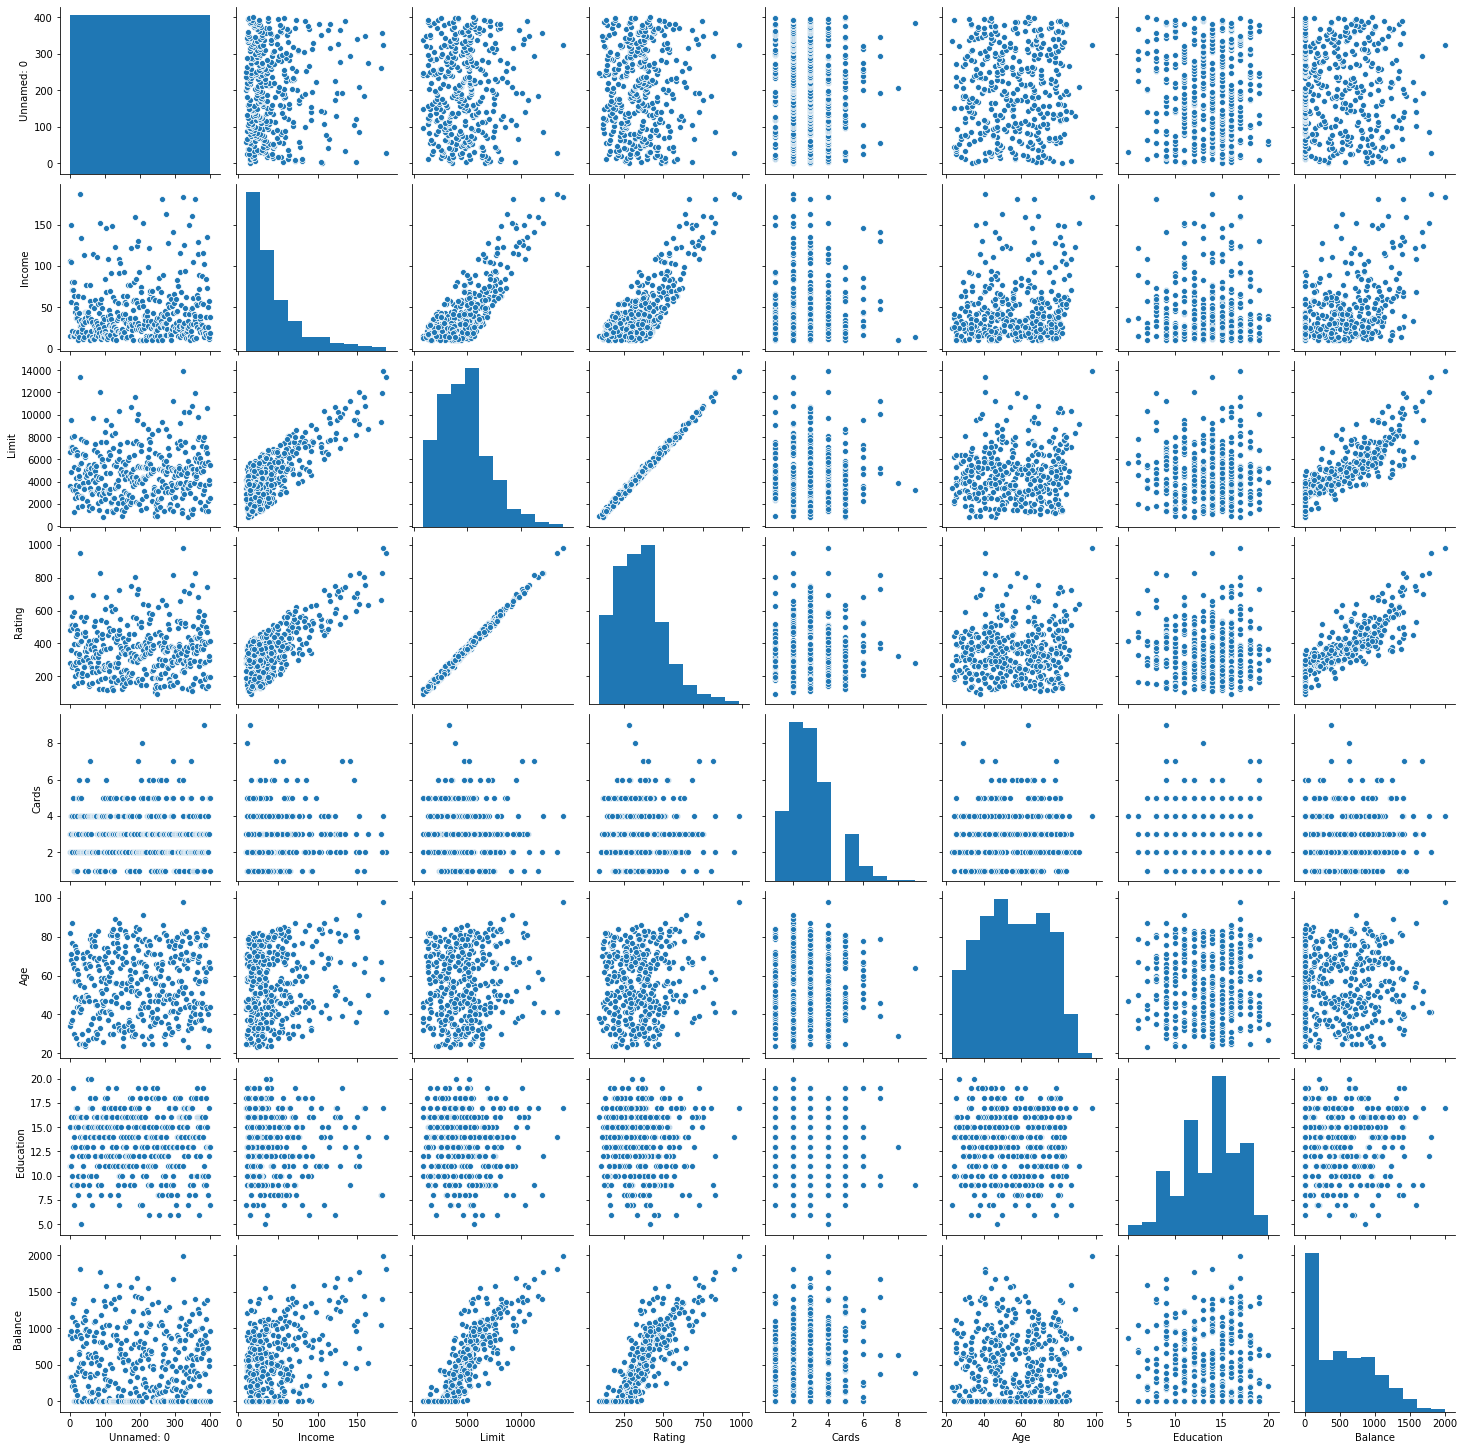

In [6]:
sns.pairplot(df)

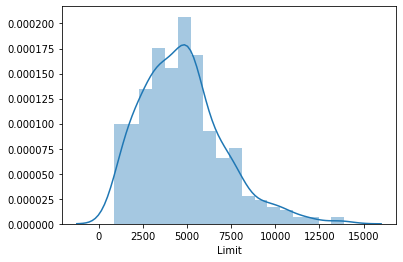

In [8]:
sns.distplot(df['Limit'])

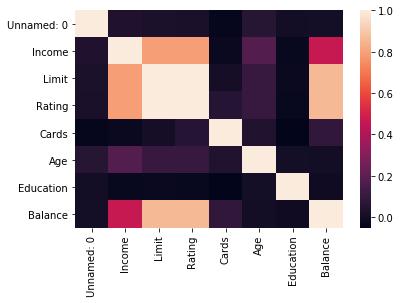

In [9]:
sns.heatmap(df.corr())

In [11]:
X = df[['Income', 'Rating', 'Cards', 'Age', 'Education']]
y = df['Limit']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
lm.coef_

array([  0.21290991,  14.86113447, -64.57977036,   0.21858165,
         3.08837386])

In [15]:
lm.intercept_

-409.2636304544485

In [18]:
coeff_df = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coeff'])
coeff_df

,Coeff
Income,0.212910
Rating,14.861134
Cards,-64.579770
Age,0.218582
Education,3.088374


In [20]:
prediction = lm.predict(X_test)
prediction

array([ 3829.61718265,  1314.36661706,  2803.07435323,  5138.53160029,
        5446.76371912,  7141.505486  ,  5737.23670898,  2034.97581518,
        4386.72359563,  4835.8848008 ,  6079.32096209,  3843.89373159,
        4019.06543031,  5197.30976316,  4944.35703117,  4445.35769161,
        5013.4180212 ,  4354.21633108,  5981.46297368,  6626.43223558,
        3307.25747225,  2849.14494265,  7478.1777445 , 11348.02542661,
        1122.84208779,  4808.75045538, 10279.49859425,  7847.15690387,
        3893.3080376 ,  3128.67050256,  3378.04466804,  3373.99796387,
        3278.69479927,  4872.607345  ,  3226.53577001,  4981.15242685,
        2268.24078143,  5843.88042806,  6547.36896475,  1496.94627967,
        1926.46433784,  6195.70718409,  3108.93858852,  7518.42921567,
        1330.16419137,  4312.99053438,  5572.32674591,  2218.42109168,
        3655.08088868,  5518.8472366 ,  4618.86299824,  4489.88105901,
        2528.67476297,  4729.98771194,  4743.30866987,  3538.10373765,
      

In [21]:
y_test

38     3899
387    1357
270    3085
181    5180
195    5384
       ... 
33     1829
212    4351
74     5390
213    5245
317    4712
Name: Limit, Length: 160, dtype: int64

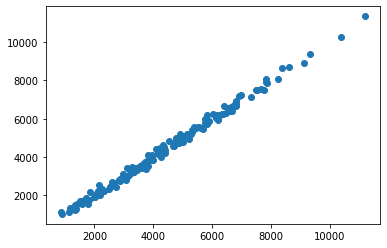

In [22]:
plt.scatter(y_test,prediction)

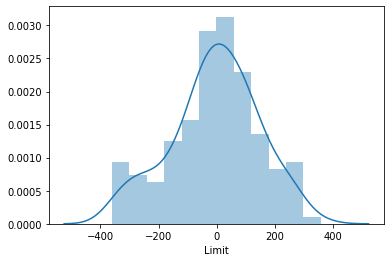

In [23]:
sns.distplot(y_test-prediction)

In [24]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,prediction)

118.23909160741985

In [25]:
metrics.mean_squared_error(y_test,prediction)

22799.95999955612

In [26]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

150.99655625065137